<a href="https://colab.research.google.com/github/DrAlexSanz/spacy/blob/master/Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding words, phrases, names and concepts
https://course.spacy.io/chapter1

## Introduction to Spacy
At the center of spaCy is the object containing the processing pipeline. We usually call this variable "nlp".

For example, to create an English nlp object, you can import the English language class from spacy dot lang dot en and instantiate it. You can use the nlp object like a function to analyze text.

It contains all the different components in the pipeline.

It also includes language-specific rules used for tokenizing the text into words and punctuation. spaCy supports a variety of languages that are available in spacy dot lang.

In [ ]:
!pip install spacy

In [ ]:
import spacy
from spacy.lang.en import English

nlp = English()
print(nlp)

When you process a text with the nlp object, spaCy creates a Doc object – short for "document". The Doc lets you access information about the text in a structured way, and no information is lost.

The Doc behaves like a normal Python sequence by the way and lets you iterate over its tokens, or get a token by its index. But more on that later!

In [ ]:
doc = nlp("Cipote!")

for token in doc:
    print(token.text)

Cipote
!


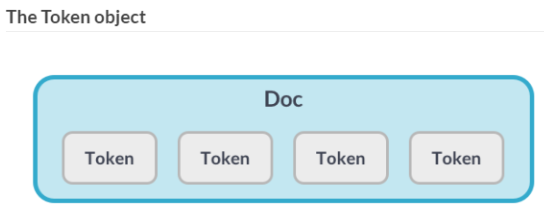

Token objects represent the tokens in a document – for example, a word or a punctuation character.

To get a token at a specific position, you can index into the Doc.

Token objects also provide various attributes that let you access more information about the tokens. For example, the dot text attribute returns the verbatim token text.

In [ ]:
doc = nlp("Hola muchachote, qué tal?")

# Index into the Doc to get a single Token
token = doc[0] # 0-indexed

# Get the token text via the .text attribute
print(token.text)

Hola


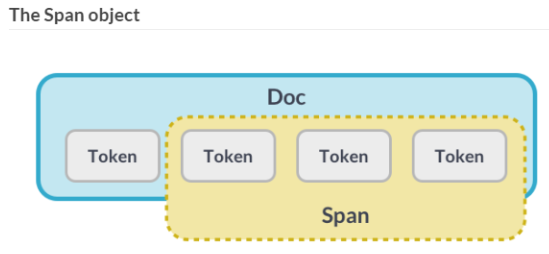

A Span object is a slice of the document consisting of one or more tokens. It's only a view of the Doc and doesn't contain any data itself.

To create a Span, you can use Python's slice notation. For example, 1 colon 3 will create a slice starting from the token at position 1, up to – but not including! – the token at position 3.

In [ ]:
doc = nlp("Hola muchachote, qué tal?")

# I can slice the doc object

span = doc[1:4]

print(span.text)

muchachote, qué


### Here you can see some of the available token attributes:

**"i" is the index of the token within the parent document.**

**"text" returns the token text.**

**"is alpha", "is punct" and "like num"** return boolean values indicating whether the token consists of alphanumeric characters, whether it's punctuation or whether it resembles a number. For example, a token "10" – one, zero – or the word "ten" – T, E, N.

These attributes are also called lexical attributes: they refer to the entry in the vocabulary and don't depend on the token's context.

In [ ]:
doc = nlp("The fondue is 25 chf/pers. but you can also pay in $, it would be twenty dollars")

print("Index: ", [token.i for token in doc])
print("Text: ", [token.text for token in doc]) # The / counts as a token too
print("is_alpha: ", [token.is_alpha for token in doc])
print("is_punct: ", [token.is_punct for token in doc])
print("like_num: ", [token.like_num for token in doc])

Index:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Text:  ['The', 'fondue', 'is', '25', 'chf', '/', 'pers', '.', 'but', 'you', 'can', 'also', 'pay', 'in', '$', ',', 'it', 'would', 'be', 'twenty', 'dollars']
is_alpha:  [True, True, True, False, True, False, True, False, True, True, True, True, True, True, False, False, True, True, True, True, True]
is_punct:  [False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False]
like_num:  [False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]


## Lexical Attributes
In this example, you’ll use spaCy’s Doc and Token objects, and lexical attributes to find percentages in a text. You’ll be looking for two subsequent tokens: a number and a percent sign.

Use the like_num token attribute to check whether a token in the doc resembles a number.

Get the token following the current token in the document. The index of the next token in the doc is token.i + 1.

Check whether the next token’s text attribute is a percent sign ”%“.

In [ ]:
doc = nlp(
    
"In 1990, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are. We can say that they are not tiesos anymore."

)

# Iterate over all the tokens

for token in doc:
    #Check it token looks like number
    if token.like_num:
        next_token = doc[token.i + 1] # don't forget the index
        if next_token.text == "%":
            print("I found a percentage: ", token.text)

print("Like num found these tokens as percents: ", [token.like_num for token in doc])

I found a percentage:  60
I found a percentage:  4
Like num found these tokens as percents:  [False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False]


# Statistical Models
Some of the most interesting things you can analyze are context-specific: for example, whether a word is a verb or whether a span of text is a person name.

## What are Statistical models ?
Statistical models enable spaCy to make predictions in context. This usually includes part-of speech tags, syntactic dependencies and named entities.

Models are trained on large datasets of labeled example texts.

They can be updated with more examples to fine-tune their predictions – for example, to perform better on your specific data.

### Model Packages
spaCy provides a number of pre-trained model packages you can download using the "spacy download" command. For example, the "en_core_web_sm" package is a small English model that supports all core capabilities and is trained on web text.

The spacy dot load method loads a model package by name and returns an nlp object.

The package provides the binary weights that enable spaCy to make predictions.

It also includes the vocabulary, and meta information to tell spaCy which language class to use and how to configure the processing pipeline.


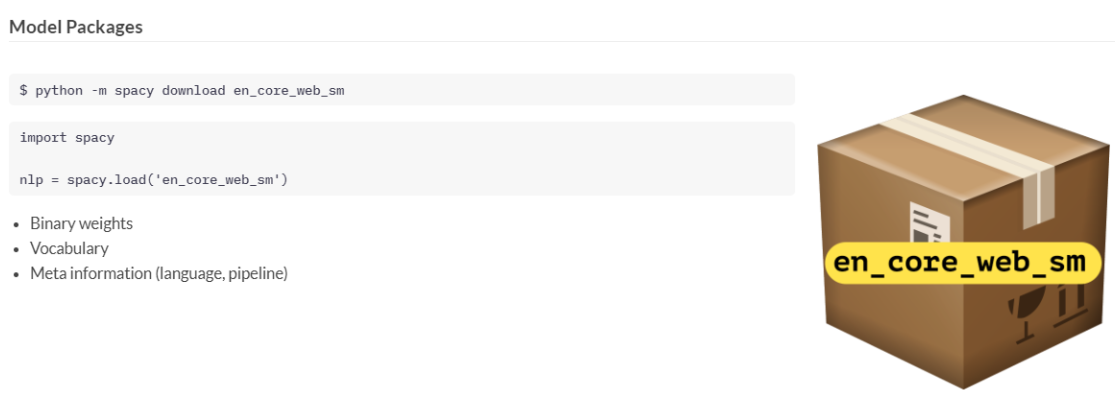

Visit: https://github.com/explosion/spacy-models/releases/

Remember, to download:

python -m spacy download pt_core_news_sm

python -m spacy download en_core_news_sm

python -m spacy download en_core_web_sm

In [ ]:
nlp = spacy.load("en_core_web_sm")

## Predicting part of speech tags
For each token in the Doc, we can print the text and the "pos underscore" attribute, the predicted part-of-speech tag.

**In spaCy, attributes that return strings usually end with an underscore – attributes without the underscore return an ID.**

Here, the model correctly predicted "ate" as a verb and "pizza" as a noun.

Let's take a look at the model's predictions. In this example, we're using spaCy to predict part-of-speech tags, the word types in context.

First, we load the small English model and receive an nlp object.

Next, we're processing the text "She ate the pizza".

For each token in the Doc, we can print the text and the "pos underscore" attribute, the predicted part-of-speech tag.

In spaCy, attributes that return strings usually end with an underscore – attributes without the underscore return an ID.

Here, the model correctly predicted "ate" as a verb and "pizza" as a noun.

In [ ]:
# Process a text
doc = nlp("She ate the pizza")
doc_esp = nlp("Se comió una pizza")
# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

# If I want an id, remove the _ from pos_
for token in doc:
    print(token.text, token.pos)

She PRON
ate VERB
the DET
pizza NOUN
She 95
ate 100
the 90
pizza 92


## Predicting Syntactic Dependencies
In addition to the part-of-speech tags, we can also predict how the words are related. For example, whether a word is the subject of the sentence or an object.

The "dep underscore" attribute returns the predicted dependency label.

The head attribute returns the syntactic head token. You can also think of it as the parent token this word is attached to.

In [ ]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text) # Root is predicat

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


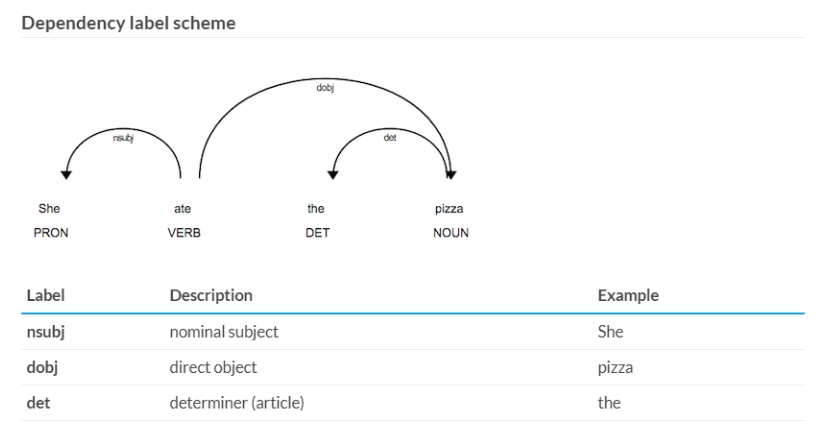

To describe syntactic dependencies, spaCy uses a standardized label scheme. Here's an example of some common labels:

The pronoun "She" is a nominal subject attached to the verb – in this case, to "ate".

The noun "pizza" is a direct object attached to the verb "ate". It is eaten by the subject, "she".

The determiner "the", also known as an article, is attached to the noun "pizza".

## Predicting Name Entities
Named entities are "real world objects" that are assigned a name – for example, a person, an organization or a country.

**The doc.ents property lets you access the named entities predicted by the model.**

It returns an iterator of Span objects, so we can print the entity text and the entity label using the "label underscore" attribute.

In this case, the model is correctly predicting "Apple" as an organization, "U.K." as a geopolitical entity and "$1 billion" as money.

In [ ]:
doc= nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


## Tip: the explain method
A quick tip: To get definitions for the most common tags and labels, you can use the spacy dot explain helper function.

For example, "GPE" for geopolitical entity isn't exactly intuitive – but spacy dot explain can tell you that it refers to countries, cities and states.

The same works for part-of-speech tags and dependency labels

In [ ]:
print(spacy.explain('ORG'))
print(spacy.explain('PER'))
print(spacy.explain('GPE'))
print(spacy.explain('NNP'))
print(spacy.explain('dobj'))
print(spacy.explain('MISC'))
print(spacy.explain('LOC'))
print(spacy.explain('PROPN'))

Companies, agencies, institutions, etc.
Named person or family.
Countries, cities, states
noun, proper singular
direct object
Miscellaneous entities, e.g. events, nationalities, products or works of art
Non-GPE locations, mountain ranges, bodies of water
proper noun


## Predicting name entities in context
Models are statistical and not always right. Whether their predictions are correct depends on the training data and the text you’re processing. Let’s take a look at an example.

* Process the text with the nlp object.
* Iterate over the entities and print the entity text and label.
* Looks like the model didn’t predict “iPhone X”. Create a span for those tokens manually.

In [ ]:
text = "New iPhone X release date leaked as Apple reveals pre-orders by mistake"

# Process the text
doc = nlp(text)

for token in doc.ents:
    print(token.text, token.label_)

iphone_x = doc[1:3]
print("Missing entity: ", iphone_x)

New iPhone EVENT
Apple ORG
iPhone X


# Rule based matching
Now we'll take a look at spaCy's matcher, which lets you write rules to find words and phrases in text.

Compared to regular expressions, the matcher works with Doc and Token objects instead of only strings.

It's also more flexible: you can search for texts but also other lexical attributes.

You can even write rules that use the model's predictions.

For example, find the word "duck" only if it's a verb, not a noun.

Why not just regular expressions ?

* Match on Doc objects, not just strings
* Match on tokens and token attributes
* Use the model's predictions

Example: "duck" (verb) vs. "duck" (noun)

Match patterns are lists of dictionaries. Each dictionary describes one token. The keys are the names of token attributes, mapped to their expected values.

In this example, we're looking for two tokens with the text "iPhone" and "X".

We can also match on other token attributes. Here, we're looking for two tokens whose lowercase forms equal "iphone" and "x".

We can even write patterns using attributes predicted by the model. Here, we're matching a token with the lemma "buy", plus a noun. The lemma is the base form, so this pattern would match phrases like "buying milk" or "bought flowers".

### Match patterns

* Lists of dictionaries, one per token
* Match exact token texts [{'ORTH': 'iPhone'}, {'ORTH': 'X'}]
* Match lexical attributes [{'LOWER': 'iphone'}, {'LOWER': 'x'}]
* Match any token attributes [{'LEMMA': 'buy'}, {'POS': 'NOUN'}]

### Using the matcher
To use a pattern, we first import the matcher from spacy dot matcher.

We also load a model and create the nlp object.

The matcher is initialized with the shared vocabulary, nlp.vocab. You'll learn more about this later – for now, just remember to always pass it in.

The matcher.add method lets you add a pattern. The first argument is a unique ID to identify which pattern was matched. The second argument is an optional callback. We don't need one here, so we set it to None. The third argument is the pattern.

To match the pattern on a text, we can call the matcher on any doc.

This will return the matches.

In [ ]:
from spacy.matcher import Matcher
doc = nlp("New iPhone X release date leaked")

matcher = Matcher(nlp.vocab)

# Add pattern to match
pattern = [{"ORTH": "iPhone"}, {"ORTH": "X"}]
matcher.add("IPHONE_PATTERN", None, pattern)

#When you call the matcher on a doc, it returns a list of tuples.
#Each tuple consists of three values: the match ID, the start index and the end index of the matched span.
#This means we can iterate over the matches and create a Span object: a slice of the doc at the start and end index.

matches = matcher(doc)
print(matches)

[(9528407286733565721, 1, 3)]


match_id: hash value of the pattern name

start: start index of matched span

end: end index of matched span

## Matching lexical attributes
Here's an example of a more complex pattern using lexical attributes.

We're looking for five tokens:
* A token consisting of only digits.
* Three case-insensitive tokens for "fifa", "world" and "cup".
* And a token that consists of punctuation.

The pattern matches the tokens "2018 FIFA World Cup:"

In [ ]:
pattern = [{"IS_DIGIT": True}, {"LOWER": "fifa"}, {"LOWER": "world"}, {"LOWER": "cup"}, {"IS_PUNCT": True}]

doc = nlp("2018 FIFA World Cup: France won!")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
matcher.add('FIFA', None, pattern)

matches = matcher(doc)

for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)



2018 FIFA World Cup:


### In this example, we're looking for two tokens:

* A verb with the lemma "love", followed by a noun.
* This pattern will match "loved dogs" and "love cats".

In [ ]:
doc = nlp("I loved dogs but now I love cats more.")

